<a href="https://colab.research.google.com/github/sudhakarmlal/EVA/blob/master/Assignment/Assignment_6A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

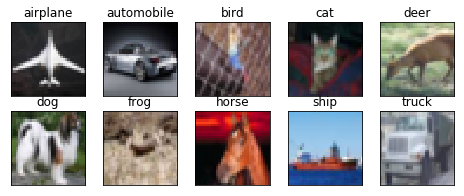

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Epoch 1/100
  5/390 [..............................] - ETA: 12s - loss: 0.2684 - acc: 0.9234

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


390/390 [==============================] - 9s 23ms/step - loss: 0.3191 - acc: 0.8949 - val_loss: 0.5735 - val_acc: 0.8282
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 0.3214 - acc: 0.8938 - val_loss: 0.5801 - val_acc: 0.8271
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 0.3166 - acc: 0.8949 - val_loss: 0.5759 - val_acc: 0.8283
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 0.3105 - acc: 0.8949 - val_loss: 0.6014 - val_acc: 0.8153
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.3067 - acc: 0.8993 - val_loss: 0.6029 - val_acc: 0.8261
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.3029 - acc: 0.8999 - val_loss: 0.5821 - val_acc: 0.8324
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.3181 - acc: 0.8954 - val_loss: 0.5737 - val_acc: 0.8294
Epoch 8/100
390/390 [==============================] - 9s 23ms/step - loss

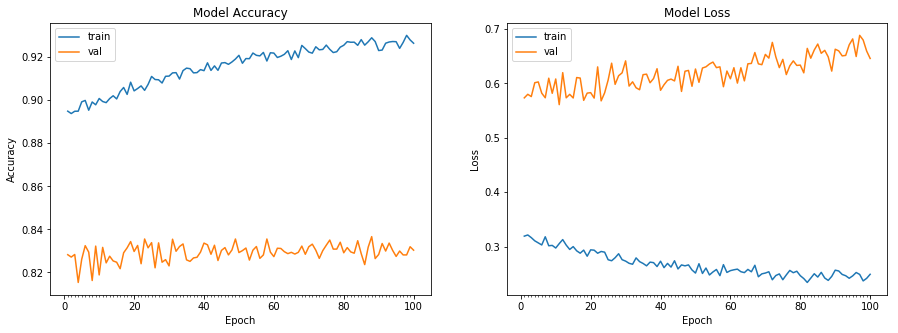

Accuracy on test data is: 83.03


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_28 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_29 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 15, 15, 96)        41568     
__________

In [0]:
# summarize dataset shape
print('Train', train_features.shape, train_labels.shape)
print('Test', (test_features.shape, test_labels.shape))
# summarize pixel values
print('Train', train_features.min(), train_features.max(), train_features.mean(), train_features.std())
print('Test', test_features.min(), test_features.max(), test_features.mean(), test_features.std())

Train (50000, 32, 32, 3) (50000, 10)
Test ((10000, 32, 32, 3), (10000, 10))
Train 0.0 1.0 0.4733649 0.25156906
Test 0.0 1.0 0.47658524 0.25121963


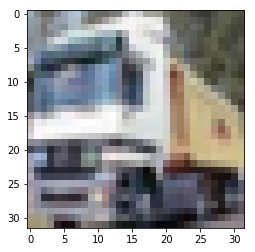

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(train_features[1])

#### Performing Image Normalization

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,data_format="channels_last")
# calculate mean on training dataset
datagen.fit(train_features)
# prepare an iterators to scale images
train_iterator = datagen.flow(train_features, train_labels, batch_size=128)
test_iterator = datagen.flow(test_features, test_features, batch_size=128)
print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))
# confirm the scaling works
batchX, batchy = train_iterator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batches train=391, test=79
Batch shape=(128, 32, 32, 3), min=-1.989, max=2.127


In [0]:
from keras.callbacks import ModelCheckpoint

In [0]:
model2 = Sequential()
model2.add(Convolution2D(filters=32,kernel_size=(3,3),strides=1,padding='same',data_format='channels_last',input_shape=(32,32,3),use_bias=False)) #(3*3,32*32) of the form (effective global receptive field,output channel size )
model2.add(BatchNormalization(axis=3))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(Convolution2D(filters=64,kernel_size=(3,3),strides=1,padding='same',use_bias=False)) #(5*5,32*32)
model2.add(BatchNormalization(axis=3))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(Convolution2D(32,1,1)) #(5*5,32*32)
model2.add(BatchNormalization(axis=3))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2))) #(10*10,16*16)
model2.add(Dropout(0.1))


model2.add(Convolution2D(filters=64,kernel_size=(3,3),strides=1,padding='same',use_bias=False)) #(12*12,16*16)
model2.add(BatchNormalization(axis=3))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(Convolution2D(filters=128,kernel_size=(3,3),strides=1,padding='same',use_bias=False)) #(14*14,16*16)
model2.add(BatchNormalization(axis=3))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))


model2.add(Convolution2D(32,1,1)) #(14*14,16*16)
model2.add(BatchNormalization(axis=3))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2))) #(28*28,8*8)
model2.add(Dropout(0.1))


model2.add(Convolution2D(filters=32,kernel_size=(3,3),strides=1,padding='same',use_bias=False)) #(30*30,8*8)
model2.add(BatchNormalization(axis=3))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))


model2.add(Convolution2D(filters=64,kernel_size=(3,3),strides=1,padding='same',use_bias=False)) #(32*32,8*8)
model2.add(BatchNormalization(axis=3))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))



model2.add(Convolution2D(filters=10,kernel_size=(1,1),strides=1,padding='same',use_bias=False)) #(32*32,8*8)
model2.add(BatchNormalization(axis=3))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))


        
model2.add(Convolution2D(num_classes,8,8)) #(40*40,10*1*1)
#passing the final activations through softmax layer.
model2.add(Flatten())
model2.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (8, 8))`


In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:
# checkpoint
filepath="./Assignment6_07_06_2019_evng-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,LearningRateScheduler(scheduler, verbose=1)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=70)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/70


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 24s 62ms/step - loss: 1.4102 - acc: 0.4838 - val_loss: 3.1844 - val_acc: 0.2908

Epoch 00001: val_acc improved from -inf to 0.29080, saving model to ./Assignment6_07_06_2019_evng-01-0.29.hdf5
Epoch 2/70

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 16s 42ms/step - loss: 0.9991 - acc: 0.6439 - val_loss: 0.9666 - val_acc: 0.6550

Epoch 00002: val_acc improved from 0.29080 to 0.65500, saving model to ./Assignment6_07_06_2019_evng-02-0.66.hdf5
Epoch 3/70

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 16s 42ms/step - loss: 0.8378 - acc: 0.7028 - val_loss: 0.9744 - val_acc: 0.6674

Epoch 00003: val_acc improved from 0.65500 to 0.66740, saving model to ./Assignment6_07_06_2019_evng-03-0.67.hdf5
Epoch 4/70

Epoch 00004: LearningRateScheduler se

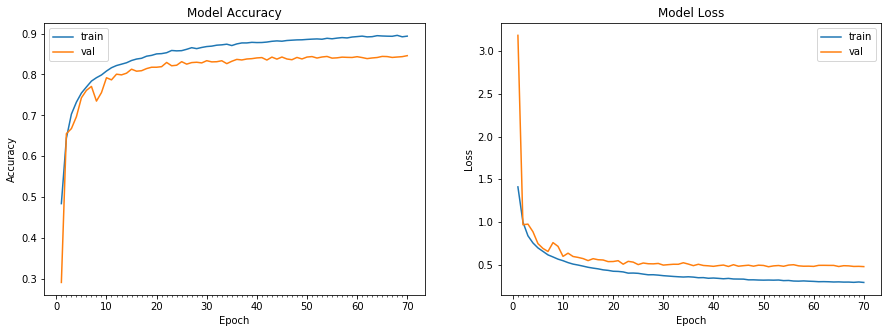

Accuracy on test data is: 84.60


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,data_format='channels_last')


# train the model
start = time.time()
# Train the model
model_info = model2.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 70, 
                                 validation_data = (test_features, test_labels), verbose=1,callbacks = callbacks_list )
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model2))